In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
import random as rd
from numpy.random import default_rng

In [30]:
data = pd.read_csv('data.csv')
data_x = np.array(data.iloc[:,0:2])
data_y = np.array(data.iloc[:,-1])
n_feat = 2
n_neur = 3
c = 0.5
u = 0.1
b = 1

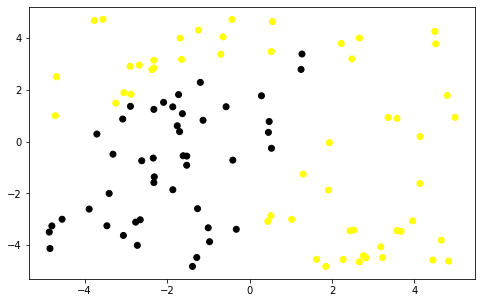

In [31]:
fig = plt.figure(figsize =(8, 5))
color_theme = np.array(['yellow','black'])
plt.scatter(data_x[:,0],data_x[:,1],c=color_theme[data_y])
plt.show()

In [32]:
def init_wei(n_feat,n_neur):
    wei = default_rng().random((n_feat+1,n_neur))
    return wei

def ACT_fx(x_arr,wei,b,row,neur):
    ACT_res = (wei[neur][-1]*b) + np.sum(wei[neur][0:n_feat]*x_arr[row])
    return ACT_res

def ACT_fx_2(TF_res_in,wei,b,neur):
    ACT_res = (wei[neur][-1]*b) + np.sum(wei[neur][0:n_feat]*TF_res_in)
    return ACT_res

def SIG_fx_in(row,neur,wei,x_arr):
    TF_a = 1/(1+np.power(np.e,-ACT_fx(x_arr,wei,b,row,neur)))
    return TF_a

def SIG_fx_out(neur,TF_res_in,wei,x_arr):
    TF_a = 1/(1+np.power(np.e,-ACT_fx_2(TF_res_in,wei,b,neur)))
    return TF_a

def DELTA_Fx_outside(y_arr,TF_a,row):
    delta_out = (y_arr[row]-TF_a)*TF_a*(1-TF_a)
    return delta_out

def DELTA_Fx_inside(TF_a,wei,delta_out,neur):
    delta_in = TF_a*(1-TF_a)*(wei[neur][0:n_feat]*delta_out)
    return delta_in

def WEI_ch(delta,c,u,TF_a,wei_diff):
    wei_diff = (c*delta*TF_a)+(u*wei_diff)
    return wei_diff

def WEI_ch_inside(delta,c,u,x_arr,row,wei_diff):
    l = np.insert(x_arr[row],2,1)
    wei_diff = (c*delta*l)+(u*wei_diff)
    return wei_diff

def neuron_web(N_ep,x_arr,y_arr):
    TF_res_in = np.empty(0)
    delta_in = np.empty(0)
    wei_add_out = np.zeros(n_feat+1)
    wei_add_in_1 = np.zeros(n_feat+1)
    wei_add_in_2 = np.zeros(n_feat+1)
    wei = init_wei(n_feat,n_neur)
    err_rate_res = [ ]
    err_rate = 0
    for epoch in range(N_ep):
        x_arr,y_arr = shuffle(x_arr,y_arr)
        err_rate_res.append(err_rate)
        err_rate = 0
        res = [ ]
        for row in range(len(x_arr)):
            for neur in range(n_neur-1):
                TF_res_in = np.append(TF_res_in,SIG_fx_in(row,neur,wei,x_arr))
            TF_res_out = SIG_fx_out(n_neur-1,TF_res_in,wei,x_arr)
            TF_res_in = np.insert(TF_res_in,2,1)
            delta_out = DELTA_Fx_outside(y_arr,TF_res_out,row)
            wei_add_out = WEI_ch(delta_out,c,u,TF_res_in,wei_add_out)
            TF_res_in = np.delete(TF_res_in,-1)
            delta_in = np.append(delta_in,DELTA_Fx_inside(TF_res_in,wei,delta_out,2)) 
            wei_add_in_1 = WEI_ch_inside(delta_in[1],c,u,x_arr,row,wei_add_in_1) 
            wei_add_in_2 = WEI_ch_inside(delta_in[0],c,u,x_arr,row,wei_add_in_2) 
            com_wei_add = np.vstack([wei_add_in_2,wei_add_in_1,wei_add_out])
            wei = wei+com_wei_add
            TF_res_in = np.empty(0)
            delta_in = np.empty(0)
            res.append(TF_res_out)
            err_rate += np.power(TF_res_out-y_arr[row],2)

    return wei, res, y_arr, err_rate_res

In [33]:
weights,res,y_arr, err_rate_res = neuron_web(500,data_x,data_y)

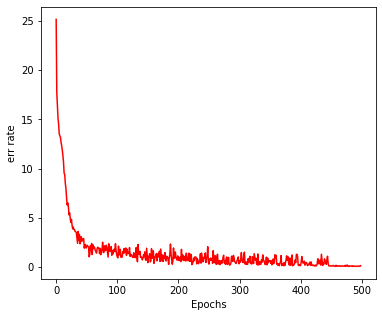

In [34]:
fig = plt.figure(figsize =(6, 5))
err_rate_res1 = err_rate_res[1:]
plt.plot(err_rate_res1,color = 'red')
plt.ylabel('err rate')
plt.xlabel('Epochs')
plt.show()

In [35]:
res1 = np.array(res)
res1[0]
labels = (res1 > 0.5).astype(int)
labels

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [36]:
weights

array([[ -2.92920754,   5.70230905, -17.33019816],
       [ -5.85307473,   1.61698388,   5.20453657],
       [-10.52004277,   9.81315723,  -4.41202472]])

In [37]:
x_arr = np.array([[0,0],[0,1],[1,0],[1,1]])
y_arr = np.array([0,1,1,0])
n_feat = 2
n_neur = 3
c = 0.5
u = 0.1
b = 1

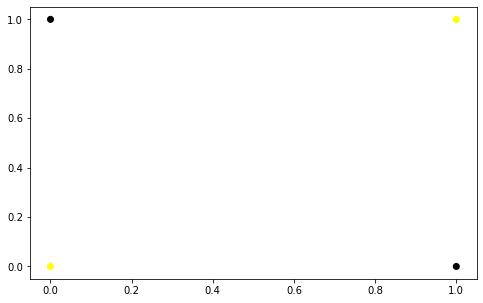

In [38]:
fig = plt.figure(figsize =(8, 5))
color_theme = np.array(['yellow','black'])
plt.scatter(x_arr[:,0],x_arr[:,1],c=color_theme[y_arr])
plt.show()

In [39]:
weights,res,y_arr1,err_rate_res = neuron_web(5_000,x_arr,y_arr)

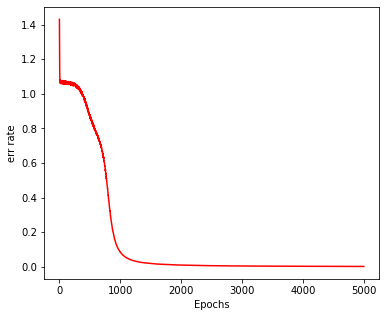

In [40]:
fig = plt.figure(figsize =(6, 5))
err_rate_res1 = err_rate_res[1:]
plt.plot(err_rate_res1,color = 'red')
plt.ylabel('err rate')
plt.xlabel('Epochs')
plt.show()

In [41]:
weights

array([[ 4.35790629,  4.35743298, -6.6853733 ],
       [ 6.31843849,  6.31631567, -2.76915475],
       [-9.59671991,  8.90652394, -4.09107809]])